In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
#흑백 이미지 데이터는 픽셀 하나당 0-255까지의 숫자값을 가지므로 이를 255로 나누면 0-1 사이로 normalize됩니다.
x_train /= 255.0
x_test /= 255.0
#one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.
C:\Users\u\Anaconda3\envs\env_tf1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\u\Anaconda3\envs\env_tf1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\u\Anaconda3\envs\env_tf1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\u\Anaconda3\envs\env_tf1.14\lib\sit

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [8]:

from keras.callbacks import TensorBoard
tb_hist = TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)

model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1, callbacks=[tb_hist])

# test_loss_and_accuracy = model.evaluate(x_test, y_test, batch_size=32)
# print('test_loss_and_accuracy : ' + str(test_loss_and_accuracy))

test_results = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
# print(type(test_results))
# print(test_results)
# print(test_results[0])
# print(test_results[1])
print("Baseline Error: %.2f%%" % (100-test_results[1]*100))



Epoch 1/5
60000/60000 [==============================] - 8s 141us/step - loss: 0.1064 - accuracy: 0.9673

Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0972 - accuracy: 0.9691
Epoch 3/5
60000/60000 [==============================] - 11s 184us/step - loss: 0.0925 - accuracy: 0.9715
Epoch 4/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0870 - accuracy: 0.9727
Epoch 5/5
10000/10000 [==============================] - 1s 70us/step
Baseline Error: 2.59%


True   7, Predict  [7]


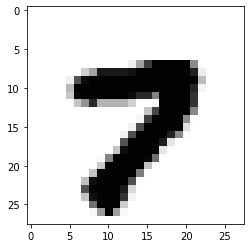

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import argmax
n = 79
print('True  ', str(argmax(y_test[[n]])) + ', Predict ', str(model.predict_classes(x_test[[n]])))
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk
